In [2]:
#cifar10 에서 데이터 로드
from keras.datasets import cifar10

(X_train, y_train), (X_test,y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [3]:
#데이터 정보
print("======= Training data =======")
print("Number of examples: ", X_train.shape[0])
print("Number of channels: ", X_train.shape[3])
print("Size of images: ", X_train.shape[1],X_train.shape[2])
print()
print('========= Test data =========')
print("Number of examples: ",X_test.shape[0])
print("Number of channels: ", X_test.shape[3])
print("Size of images: ", X_test.shape[1],X_test.shape[2])

======= Training data =======
Number of examples:  50000
Number of channels:  3
Size of images:  32 32

========= Test data =========
Number of examples:  10000
Number of channels:  3
Size of images:  32 32


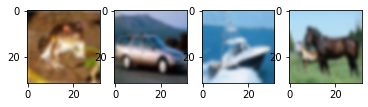

In [4]:
#이미지 실제로 출력확인
import matplotlib.pyplot as plt
plt.subplot(141)
plt.imshow(X_train[0], interpolation="bicubic")
plt.grid(False)
plt.subplot(142)
plt.imshow(X_train[4], interpolation= "bicubic")
plt.grid(False)
plt.subplot(143)
plt.imshow(X_train[8], interpolation= "bicubic")
plt.grid(False)
plt.subplot(144)
plt.imshow(X_train[12], interpolation= "bicubic")
plt.grid(False)
plt.show()



In [5]:
#Data Preprocessing : Normalization
import numpy as np
print("Mean before normalization: ", np.mean(X_train))
print("Std before normalization: ", np.std(X_train))

mean = [0,0,0]
std = [0,0,0]
new_X_train = np.ones(X_train.shape)
new_X_test = np.ones(X_test.shape)

#train set에 있는 데이터로만 mean과 std를 사용
for i in range(3):
  mean[i] = np.mean(X_train[:,:,:,i])
  std[i] = np.std(X_train[:,:,:,i])

#train set의 mean과 std로 train set과 test set 모두 normalization
for i in range(3):
  new_X_train[:,:,:,i] = X_train[:,:,:,i] - mean[i]
  new_X_train[:,:,:,i] = new_X_train[:,:,:,i] / std[i]
  new_X_test[:,:,:,i] = X_test[:,:,:,i] - mean[i]
  new_X_test[:,:,:,i] = new_X_test[:,:,:,i] / std[i]

X_train = new_X_train
X_test = new_X_test

print("Mean aftrer normalization: ",np.mean(X_train))
print("Std after normalization: ", np.std(X_train))
print(X_train.max())

Mean before normalization:  120.70756512369792
Std before normalization:  64.1500758911213
Mean aftrer normalization:  4.91799193961621e-17
Std after normalization:  0.9999999999999996
2.126789409516928


In [6]:
#Parameter setting

from keras.utils import np_utils
#main paramater
batch_size = 512
num_classes = 10
num_epochs = 50
learning_rate = 0.001
lr_weight_decay = 0.95

img_rows = 32
img_cols = 32

#one-hot encoding
y_train = np_utils.to_categorical(y_train,num_classes)
y_test = np_utils.to_categorical(y_test,num_classes)


In [8]:
#Training

from keras import initializers
from keras.models import Sequential
from keras.layers import Dense, Activation
from tensorflow.keras import optimizers
from keras.layers import Conv2D, Dropout, MaxPooling2D, Flatten
import tensorflow as tf
import copy

result = {}
y= {}
loss = []
acc=[]
dropouts = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for dropout in dropouts:
  print("Dropopt: ", (dropout))
  model = Sequential()

  #layer1
  model.add(Conv2D(64,3,3,
                   padding='same',
                   activation = 'relu',
                   input_shape = (img_rows, img_cols,3)))
  model.add(Dropout(dropout))
  model.add(Conv2D(64,3,3,
                   padding = 'same',
                   activation='relu',
                   ))
  model.add(Dropout(dropout))
  model.add(MaxPooling2D(pool_size = (2,2),padding='same'))

  #layer2
  model.add(Conv2D(128,3,3,padding='same',activation='relu'))
  model.add(Dropout(dropout))
  model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

  #layer3
  model.add(Conv2D(256,3,3,activation='relu',padding='same'))
  model.add(Dropout(dropout))
  model.add(MaxPooling2D(pool_size=(2,2),padding='same'))

  #layer4
  model.add(Flatten())
  model.add(Dense(512,activation='relu'))

  #layer5
  model.add(Dense(512,activation ='relu'))

  #layer6
  model.add(Dense(num_classes,activation='softmax'))

  model.compile(loss='categorical_crossentropy',
                optimizer = 'sgd',
                metrics=['acc'])

  model_cce = model.fit(X_train,y_train,
                        batch_size = batch_size, 
                        epochs = num_epochs,
                        verbose =1,
                        shuffle =True, 
                        validation_data = (X_test,y_test))
  score = model.evaluate(X_test,y_test,verbose=0)
  y[dropout] = model.predict(X_test)

  print('Test score: ', score[0])
  print('TEst accuracy: ',score[1])
  result[dropout] = copy.deepcopy(model_cce.history)
  loss.append(score[0])
  acc.append(score[1])

Dropopt:  0.0
Epoch 1/50
98/98 [==============================] - 13s 19ms/step - loss: 2.3017 - acc: 0.1298 - val_loss: 2.3007 - val_acc: 0.1596
Epoch 2/50
98/98 [==============================] - 1s 14ms/step - loss: 2.3000 - acc: 0.1703 - val_loss: 2.2990 - val_acc: 0.1871
Epoch 3/50
98/98 [==============================] - 1s 14ms/step - loss: 2.2982 - acc: 0.1915 - val_loss: 2.2971 - val_acc: 0.2025
Epoch 4/50
98/98 [==============================] - 1s 14ms/step - loss: 2.2961 - acc: 0.2072 - val_loss: 2.2946 - val_acc: 0.2154
Epoch 5/50
98/98 [==============================] - 1s 14ms/step - loss: 2.2933 - acc: 0.2110 - val_loss: 2.2913 - val_acc: 0.2208
Epoch 6/50
98/98 [==============================] - 1s 14ms/step - loss: 2.2894 - acc: 0.2138 - val_loss: 2.2866 - val_acc: 0.2248
Epoch 7/50
98/98 [==============================] - 1s 14ms/step - loss: 2.2837 - acc: 0.2185 - val_loss: 2.2795 - val_acc: 0.2240
Epoch 8/50
98/98 [==============================] - 1s 14ms/step - l